In [26]:
%matplotlib inline
import pandas as pd
import numpy as np

%run ../flaskr/queries.py

Query took  21
0


Get totals plus results for a specific query. The specific query needs to be normalized. 

In [27]:
totals = simple_query_totals()
country_mask = totals.country_code == country_code
totals = totals[country_mask]

specific_query = simple_query_totals({"query": "body_text_ws:flot", 
                                      "filter": ["country_s:dk", "langid_s:da"]})

Query took  22
Query took  3


### Gender distribution

In [30]:
gender_totals = totals.groupby('gender').num_docs.sum()
gender_query = specific_query.groupby('gender').num_docs.sum()

Percentage of male and female documents that contain the term. The two bars do not sum to 1, and in fact can be over 1 over when added.

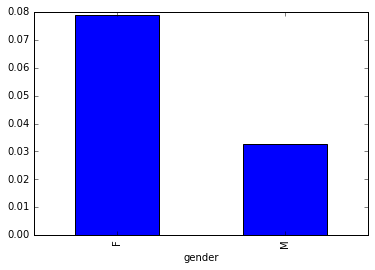

In [36]:
(gender_query / gender_totals).plot(kind='bar')

If we pretend that the dataset is balanced, that is the number of females and males are equal, we can present a figure that shows how the found documents are distributed. The phrasing could be something like "adjusted for sample size".

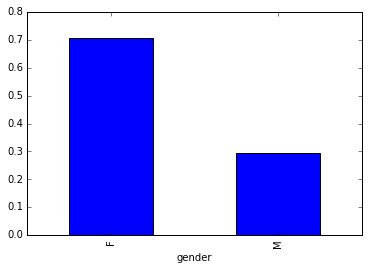

In [53]:
abs_percentages = gender_query / gender_totals
renormalizer = 1.0 / abs_percentages.sum()
(abs_percentages * renormalizer).plot(kind='bar')

## Age distribution

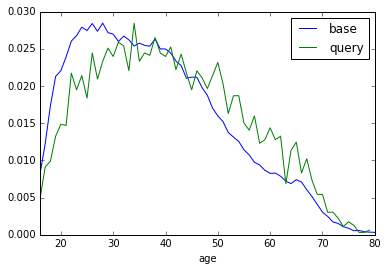

In [82]:
def sort_and_filter_age(age_df):
    age_df.index = age_df.index.astype(int)
    ages_index = [age for age in sorted(age_df.index)
                  if age >= 16
                  if age <= 80]
    return age_df.ix[ages_index]

age_totals = totals.groupby('age').num_docs.sum()
age_totals = sort_and_filter_age(age_totals)
age_totals_norm = age_totals / age_totals.sum()

age_specific_query = specific_query.groupby('age').num_docs.sum()
age_specific_query = sort_and_filter_age(age_specific_query)
age_specific_query_norm = age_specific_query / age_specific_query.sum()

compare_df = pd.DataFrame({'base': age_totals_norm, 'query': age_specific_query_norm})

compare_df.plot()

Less jagged graphs with rolling mean.

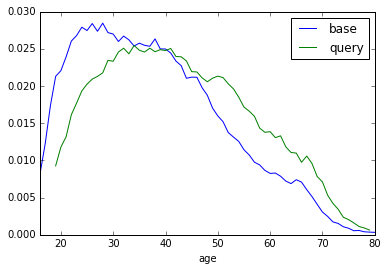

In [115]:
compare_df = pd.DataFrame({'base': age_totals_norm, 
                           'query': pd.rolling_mean(age_specific_query_norm, 4)})

compare_df.plot()

## Age and gender

A slight variation on plotting by age

In [132]:
def prepare_age_and_gender(df):
    age_gender_df = df.groupby(['age', 'gender']).num_docs.sum()
    age_gender_df = age_gender_df.unstack('gender')
    age_gender_df = sort_and_filter_age(age_gender_df)
    
    # Normalize
    return (age_gender_df / age_gender_df.sum())    

age_and_gender_totals = prepare_age_and_gender(totals)
age_and_gender_specific_query = prepare_age_and_gender(specific_query)

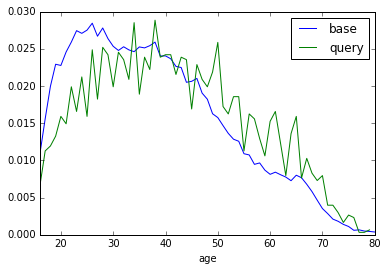

In [135]:
compare_male_df = pd.DataFrame({'base': age_and_gender_totals['M'],
                                'query': age_and_gender_specific_query['M']})

compare_male_df.plot()

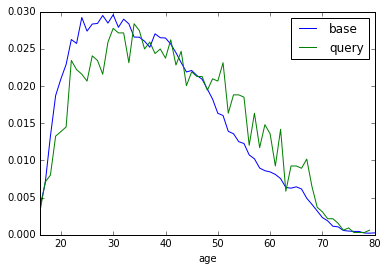

In [136]:
compare_female_df = pd.DataFrame({'base': age_and_gender_totals['F'],
                                'query': age_and_gender_specific_query['F']})

compare_female_df.plot()